In [6]:
%load_ext autoreload
%autoreload 2

In [8]:
from hexagon_utilities import *
import matplotlib.pyplot as plt

### Create ColorLists for Use.

Named colors are useful.

In [9]:
import matplotlib.colors as mcolors
colors_d = mcolors.CSS4_COLORS
# Sort colors by hue, saturation, value and name
by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))), name)
                for name, color in colors_d.items())
mcolor_names = [name for hsv, name in by_hsv] #pluck the names, sorted by HSV



BLACK_WHITES = mcolor_names[:13]
RED_BROWNS = mcolor_names[14:29]
BROWNS = mcolor_names[29:36]
BEIGES = mcolor_names[36:49]
YELLOWS = mcolor_names[50:64]
GREENS = mcolor_names[64:81]
CYANS = mcolor_names[85: 99]
BLUES = mcolor_names[100:121]
PURPLES = mcolor_names[122:132]
PINKS = mcolor_names[132:145]

red_inds = [21, 22, 23, 24, 25, 26, 27, 145]
REDS = [mcolor_names[x] for x in red_inds]


color_sets = [REDS, PINKS, PURPLES, BLUES, CYANS, GREENS, YELLOWS, BEIGES, BROWNS, RED_BROWNS, BLACK_WHITES]

# Draw a smaller sized Hexagon inside the main Grid

In [35]:
REDS + BLUES

['red',
 'mistyrose',
 'salmon',
 'tomato',
 'darksalmon',
 'coral',
 'orangered',
 'crimson',
 'powderblue',
 'lightblue',
 'deepskyblue',
 'skyblue',
 'lightskyblue',
 'steelblue',
 'aliceblue',
 'dodgerblue',
 'lightslategray',
 'lightslategrey',
 'slategray',
 'slategrey',
 'lightsteelblue',
 'cornflowerblue',
 'royalblue',
 'ghostwhite',
 'lavender',
 'midnightblue',
 'navy',
 'darkblue',
 'mediumblue']

## How does this effect work:

- 1. We make a dictionary of colors (randomly chosen) and fractional size (for ever-shrinking) hexagons
- 2. For each hexagonal space, we loop through and plot the 5 hexagons, big to small
- 3. For a cooler effect, I rotate each smaller hexagon by 30 degrees (pi/6)

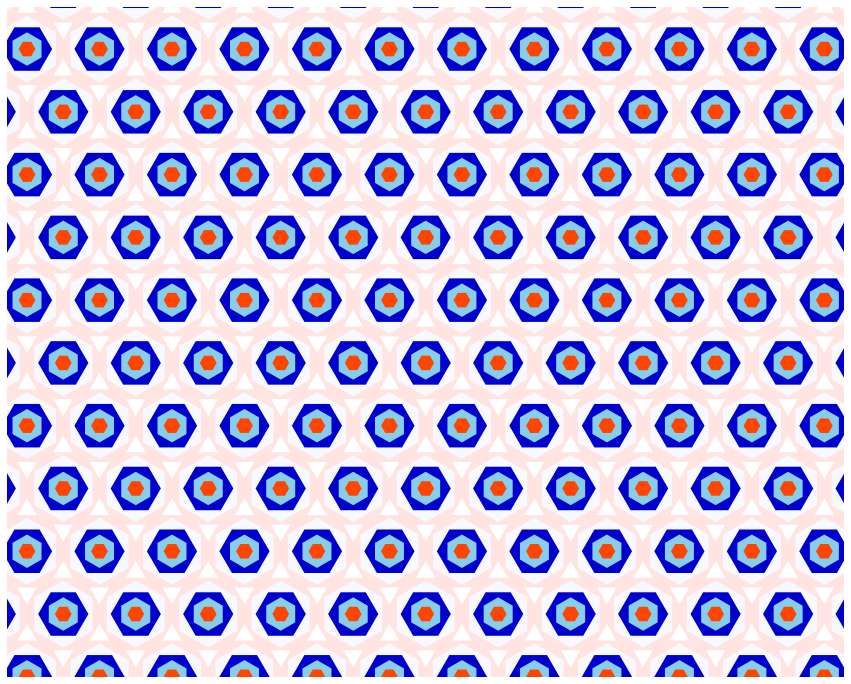

In [44]:
fig, ax = plt.subplots(figsize=(15,15))

#color_size_dict = {'blue': 0.9, 'red': 0.8, 'black': 0.6, 'white': 0.2}


#Let's specify sizes and colors for the inner hexagons
inner_hexes = 5
palette = REDS + BLUES
colors = np.random.choice(palette, inner_hexes)
fracs = np.arange(1,0, step=-1/inner_hexes)

color_size_dict = dict(zip(colors, fracs))
hg = HexGrid(20,14,1, flat=False)

for h in hg.hlist:
    rot_index=0
    for color, frac in color_size_dict.items():
        rot_index +=1
        h.render_regular_polygon_from_center(polygon_sides=6, 
                                             polygon_size=h.size*frac, 
                                             fc=color,
                                             angle_radians = pi/6*rot_index)
    
ax.axis('scaled')
ax.set_xlim(-10, 10)
ax.set_ylim(-8, 8)
plt.axis('off')


SAVE_FILE = True

if SAVE_FILE:
    dtstr = datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%p")
    plt.savefig(f'../images/Concentric_{dtstr}.jpg')

In [ ]:
#Rhombuses are made up of 3 Adjacent vertices and the Center
RHOMBUSES1 = {'west': (0,1,2), 'northeast': (2,3,4), 'southwest': (4,5,0)}
RHOMBUSES2 = {'northwest': (1,2,3), 'east': (3,4,5),  'south':(5, 0,1)}
SPOKES_3A = (1,3,5)
SPOKES_3B = (0,2,4)
TRIANGLES = ((0,1), (1,2), (2,3), (3,4), (4,5), (5,0) )



fig, ax = plt.subplots(figsize=(15,15))


hg = HexGrid(20,14,1, flat=True)


for h in hg.hlist:
#    palette = np.random.choice(color_sets)
    start = np.random.randint(0, 142)
    for idx, pt_list in enumerate(TRIANGLES):
        h.render_polygon(pt_list, include_center=True,
#                         alpha=round(np.random.random(), 1),
#                           color=np.random.choice(palette),
                         color = mcolor_names[start+idx],
                         fill=True)

OUTLINE = False
SPOKES = False
        
        
if OUTLINE:
    hg.render_grid(color='w', 
                   lw=4,
                   fill=None)
if SPOKES:        
    c_to_v = [1,3,5]
    hg.render_grid_spokes([0, 2,4],
                          color='k', lw=4)

ax.axis('scaled')
ax.set_xlim(-10, 10)
ax.set_ylim(-8, 8)
plt.axis('off')

SAVE_FILE = True

if SAVE_FILE:
    dtstr = datetime.now().strftime("%Y-%m-%d_%H-%M-%S_%p")
    plt.savefig(f'../images/Triangles_{dtstr}.jpg')